# The California Racial Justice Act & San Diego PD RIPA Data


## Abstract 

Approved in 2020, the California Racial Justice Act allows defendants to appeal for a retrial of their case or an adjustment of the charges or sentencing leveled at them if they can prove that there was racial bias at play. The bill doesn’t actually specify the kind of statistical proof a judge would require, though, so this project is a preliminary search to start to find out what kinds of aspects of criminal justice data might be useful to those invoking the CRJA. To that end, this project used pandas to analyze a dataset of San Diego Police Department stop data collected under RIPA, the Racial and Identity Profiling Act of 2015. 

## Table of Contents

1. ### [Introduction](#introduction)
2. ### [Methods](#methods)
3. ### [Results](#results)
4. ### [Discussion](#discussion)
5. ### [Sources + Adjacent Data](#sources)

## Introduction <a id='introduction'></a>

The California Racial Justice Act (AB-2542), approved by the governor in September 2020, is legislation that intends to combat racial bias and disparities in the criminal justice system by offering defendants a chance to contest their cases. The CRJA is usable on multiple levels — checking racial bias both in and out of courtrooms — as it addresses within-court instances of bias as well as racially charged disparities in sentencing, charges, and convictions. If the defendant invoking the CRJA can provide proof of discrimination occurring, a new trial will be set up for the case or the charges or sentence may be adjusted, depending on how far along the court case is. 

It’s key legislation in that it not only takes into account intentional bias directed at the defendant (by any other key figure in the courtroom processes) but also racially coded language or interactions. The aspect of the CRJA that this project specifically has focused on is racial disparities in charges. The evidence needed for proof of discrimination in court (when it comes to racial bias in charges) is differences due to race, national origin, or ethnicity in charges on a county-wide basis. 

The goal of this project was originally to synthesize a database of information (via extensive data collection, organization, and cleaning) that searches for evidence of racial discrimination, bias, or disparities in terms of individuals stopped by the police and what charges they faced as a result. It ended up focusing on a relatively narrow dataset, using pandas to explore and analyze specifically traffic stop data collected by the San Diego Police Department as part of the Racial and Identity Profiling Act of 2015. 


## Methods <a id='methods'></a>

All data used can be found & downloaded [here](https://data.sandiego.gov/datasets/police-ripa-stops/) and on linked pages.

First, lets import and consolidate San Diego RIPA data into one massive df (result_df)

In [1]:
import pandas as pd   
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

import datetime
from datetime import date
 

# somebody want to do some geospatial analysis or plotting?
# import geopandas as geopandas as gpd

# somebody want to get into doing Veil of Darkness testing?
# from astral import LocationInfo
# from astral.geocoder import database, lookup
# from astral.sun import sun
# city = lookup("San Diego", database())

# utility functions to convert data to type and handle missing values properly
def convert_dtype_float(x):
    if not x:
        return np.NaN
    try:
        return float(x)   
    except:        
        return np.NaN
    
def convert_dtype_stopcode(x):
    if not x:
        return -1
    try:
        return int(x)   
    except:        
        return -1    
    
def convert_dtype_string(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

# Descriptions of the people stopped as perceived by the officer: disability/gender/race/ethnicity
disability_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_disability_datasd.csv")
gender_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_gender_datasd.csv", 
                        converters = {"gender": convert_dtype_string})
race_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_race_datasd.csv")

# Result of stop: warning, citation, arrest, search, etc
stop_result_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_stop_result_datasd.csv")

# Reason for stop: codes and text description [optional/dirty]
stop_reason_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_stop_reason_datasd.csv", 
                             converters = {"reason_for_stopcode": convert_dtype_stopcode})

# Details: where the stop was made, who the officer was, etc.
stop_details_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_stops_datasd.csv", 
                              converters = {"land_mark": convert_dtype_string,
                                            'date_stop': convert_dtype_string}) 

# Seizures: basis for seizure and what what was taken   
prop_seize_basis_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_prop_seize_basis_datasd.csv", 
                                  converters = {"basisforpropertyseizure": convert_dtype_string})
prop_seize_type_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_prop_seize_type_datasd.csv", 
                                 converters = {"type_of_property_seized": convert_dtype_string})        

# Search: there are additional datasets for whether/how/why stopped subjects were searched. 
# loading, processing, and joining these are left as an exercise


# put it all together
result_df = pd.merge(disability_df, gender_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])

# make a consolidated datetime column
result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'], errors='coerce')


### PART 1: PRELIMINARY DATA BREAKDOWNS & ANALYSIS

In [2]:
#missingno package allows for visualization of missing data within result_df

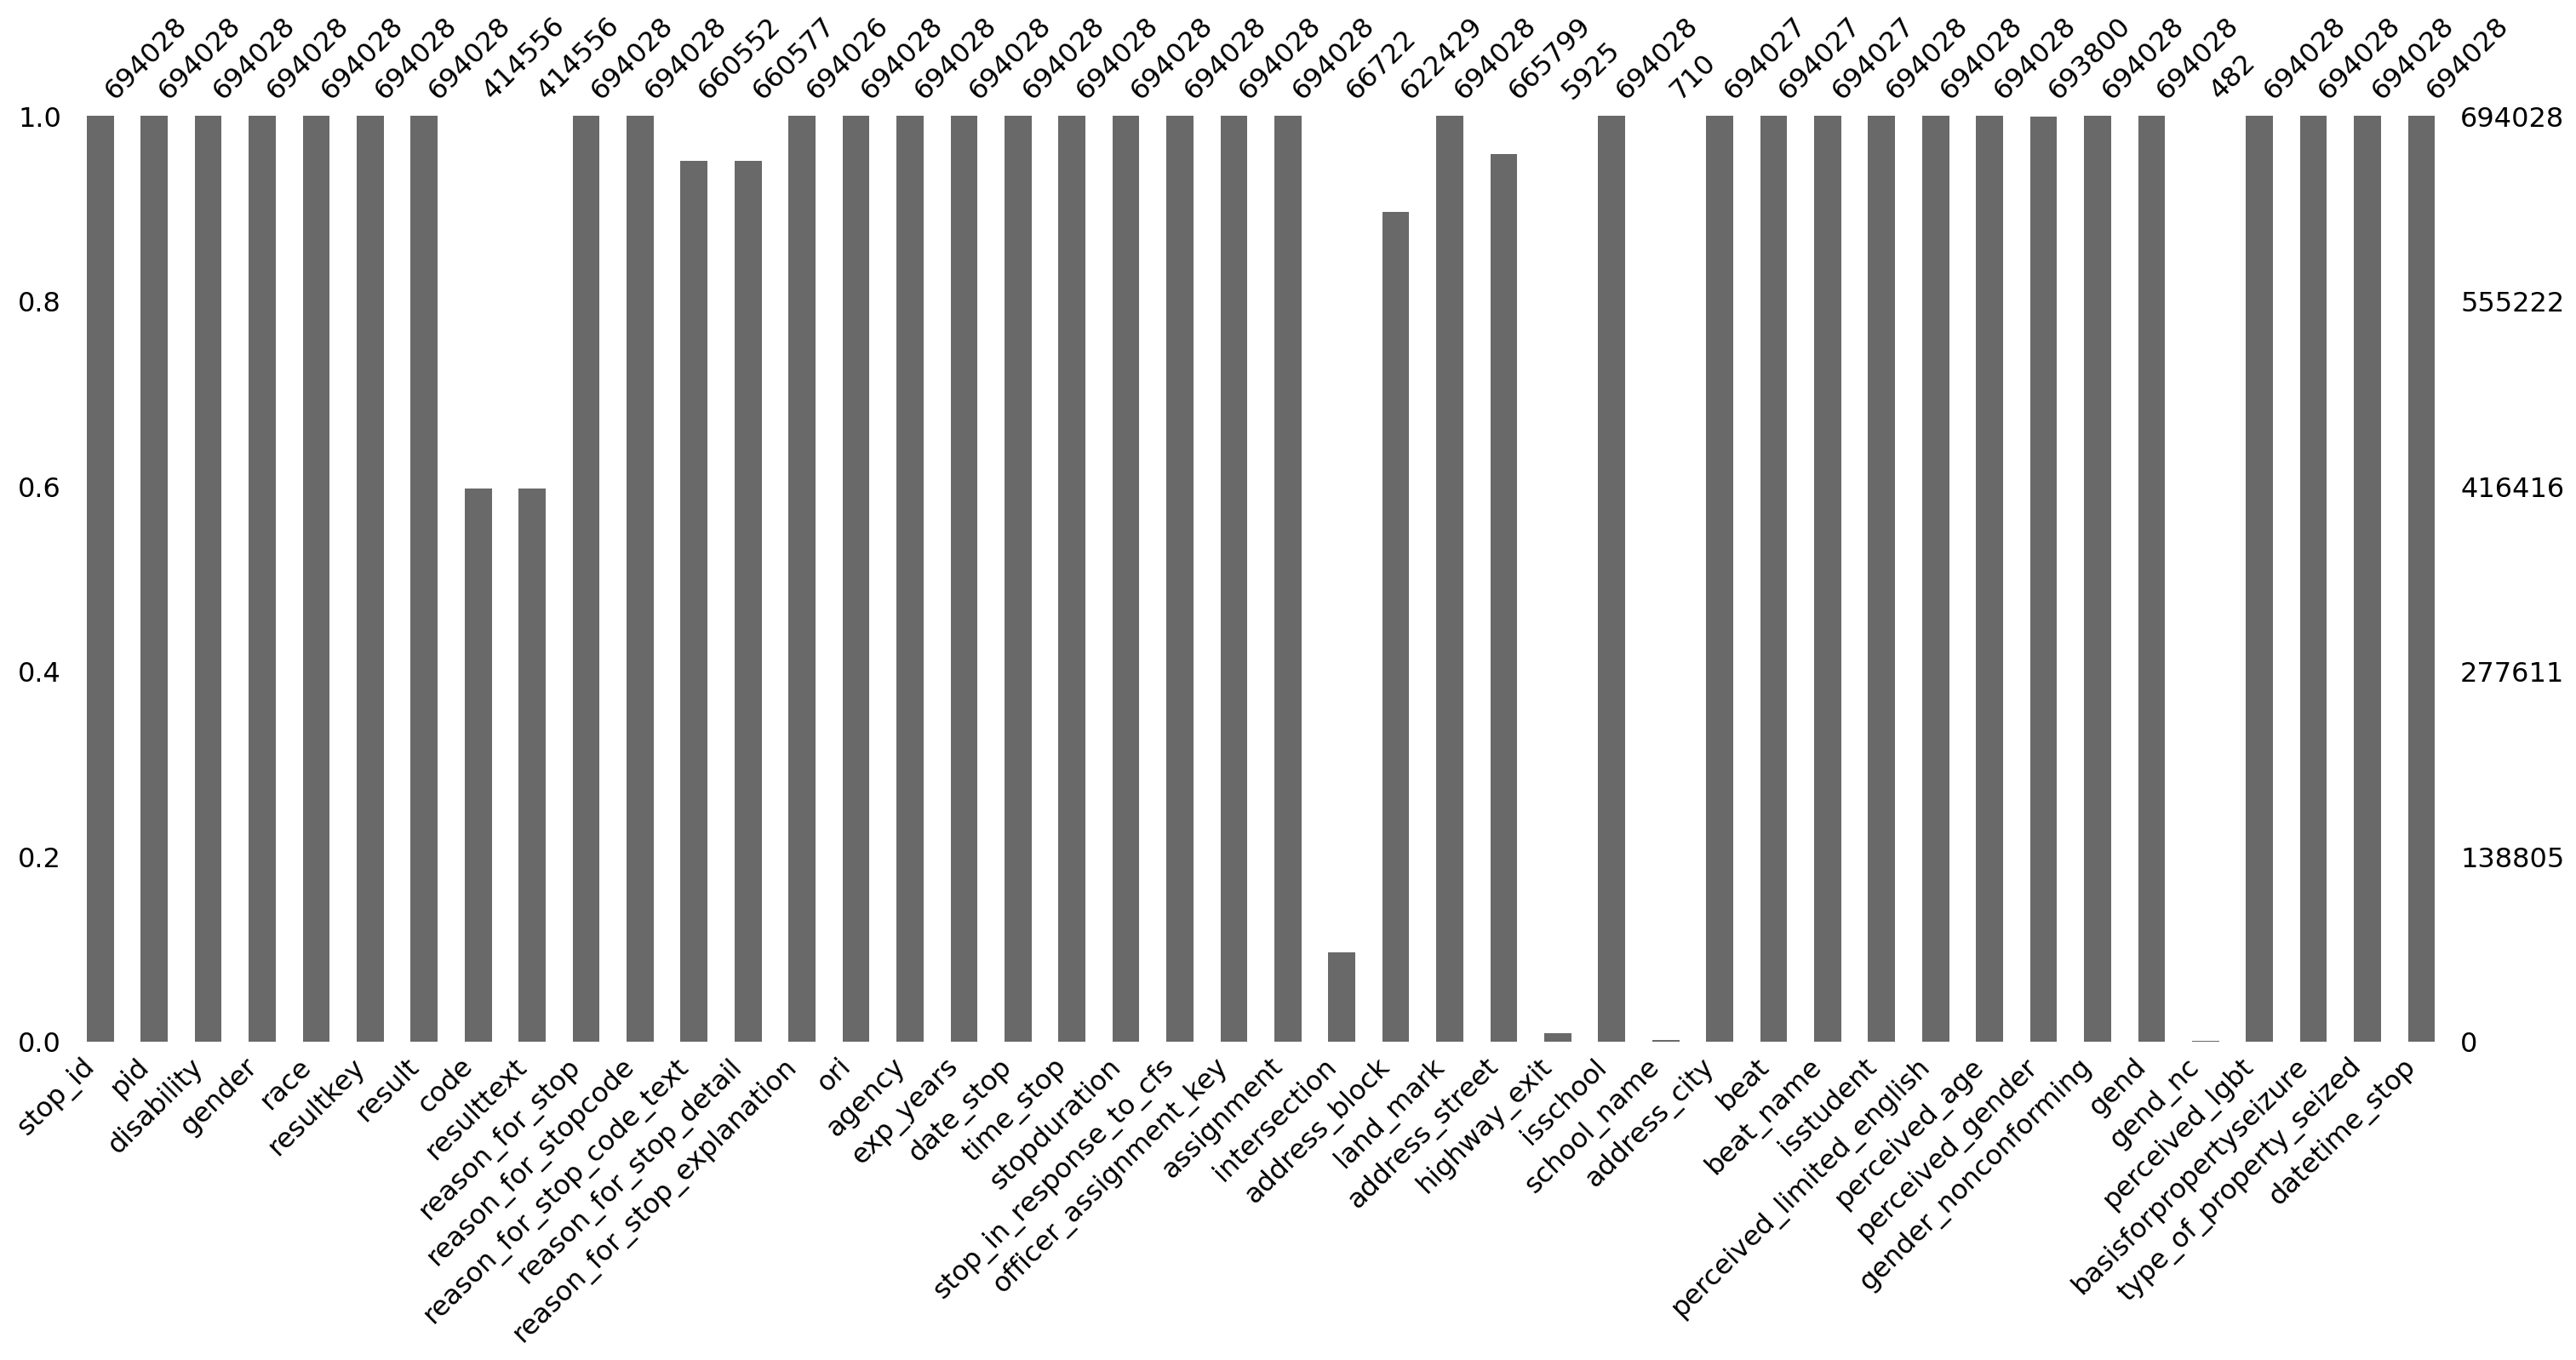

In [2]:
msno.bar(result_df);

In [7]:
# date range of the RIPA data
result_df['date_stop'].min(), result_df['date_stop'].max()

('2018-07-01', '2022-03-31')

In [8]:
stops = result_df.groupby('resulttext')['stop_id'].count().sort_values(ascending=False)
stops.name = 'how many'
stops = stops.to_frame()

In [9]:
stops.iloc[:50]

,how many
resulttext,
65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,41793
22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,20530
22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,17935
21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,12954
22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,12056
23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,10895
25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,10008
602 PC - TRESPASSING (M) 32022,9943
4000(A)(1) VC - NO REG:VEH/TRAILER/ETC (I) 54657,9520


In [16]:
those = result_df.query('code in [65002,65000]')

keywords = '54.0110|encroach|incroach|encroch|incroch'

these = those['reason_for_stop_explanation'].str.lower().str.contains(keywords)

print('Specifically labelled encroachment OR 54.0110 for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          those.loc[these,'stop_id'].unique().shape[0], 
          those.loc[these].shape[0] ) 
     )


encroach = those.loc[these]
encroach.date_stop = pd.to_datetime( encroach.date_stop )
encroach['year'] = encroach.date_stop.dt.year.astype(str)
encroach['year-month']=encroach.date_stop.dt.strftime("%Y-%m")
encroach['type'] = encroach.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')
trans = {'Citation for infraction':'citation', 'In-field cite and release':'citation', 'Custodial Arrest without warrant':'arrested', 'Warning (verbal or written)':'warning'}
encroach['action']=encroach['result'].apply( lambda x: trans[x])



Specifically labelled encroachment OR 54.0110 for both infraction and misdemeanor:
 3583 stops covering 5030 persons


<ipython-input-16-7e8ffa2f2ce9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach.date_stop = pd.to_datetime( encroach.date_stop )
<ipython-input-16-7e8ffa2f2ce9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach['year'] = encroach.date_stop.dt.year.astype(str)
<ipython-input-16-7e8ffa2f2ce9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

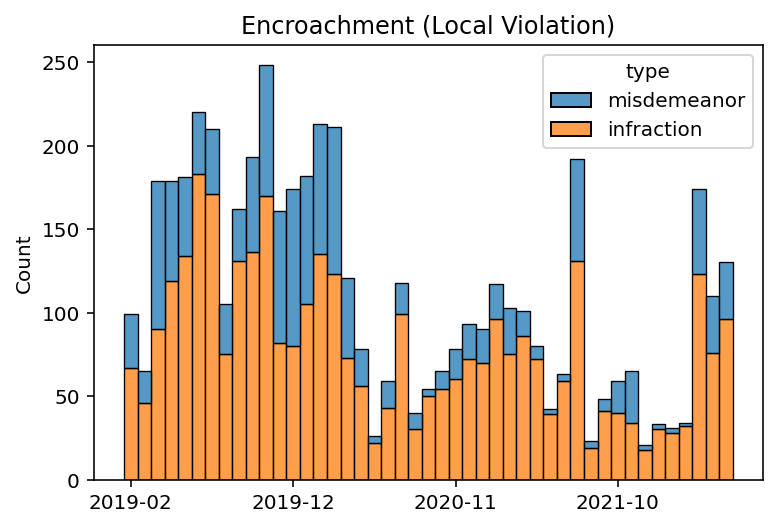

In [17]:

g  = sns.histplot(data=encroach, x='year-month', hue='type', multiple='stack',hue_order=('misdemeanor','infraction'))#, stat='density', multiple='dodge', common_norm=False);
ticks = g.get_xticks()
#labels = g.get_xticklabels()
ticks=[0,12,24,36]
g.set_xticks(ticks)
g.set_xlabel('');
g.set_title('Encroachment (Local Violation)');

In [18]:

( encroach.groupby('type')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         encroach.groupby(['type','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     ) 
)

<ipython-input-18-40911ce0d1cd>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('type')['stop_id']


,total,"(percent, arrested)","(percent, citation)","(percent, warning)"
type,,,,
infraction,3571,3,64,31
misdemeanor,1459,38,38,23


In [19]:
res = ( encroach.groupby(['race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
      )
res = res / res.sum() * 100
res.astype(int)

,percent
race,
Asian,1
Black/African American,26
Hispanic/Latino/a,16
Middle Eastern or South Asian,0
Native American,0
Pacific Islander,0
White,53


Encroachments are less Hispanic and more Black and White than expected from city census of races

In [20]:
( encroach.groupby('action')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         encroach.groupby(['action','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
)
 

<ipython-input-20-9d386516ae7d>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('action')['stop_id']


,total,"(percent, Asian)","(percent, Black/African American)","(percent, Hispanic/Latino/a)","(percent, Middle Eastern or South Asian)","(percent, Native American)","(percent, Pacific Islander)","(percent, White)"
action,,,,,,,,
arrested,675,1,28,19,0,0,1,49
citation,2871,1,26,17,0,0,0,52
warning,1484,1,26,14,0,0,0,56


The table above shows evidence that, given you are getting a warning and not some other action, you are more likely to be White and less likely to be Latino.  Blacks hold steady at roughly the same percentage no matter what the action.

In [21]:
( encroach.groupby('race')['stop_id']
     .count()
     .rename('total for all actions')
     .to_frame()
#     .apply(lambda x: (100*x/x.sum()).astype(int) )
     .join(
         encroach.groupby(['race','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
).drop( ['Asian','Middle Eastern or South Asian','Native American','Pacific Islander'])
# drop races with <100 citations

<ipython-input-21-877d134baa4b>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('race')['stop_id']


,total for all actions,"(percent, arrested)","(percent, citation)","(percent, warning)"
race,,,,
Black/African American,1341,14,56,28
Hispanic/Latino/a,847,15,59,25
White,2690,12,56,31


The table above shows evidence that, given you are a White person stopped for encroachment, as compared to POC you are more likely to get a warning and less likely to get a citation or arrested. Basically in these cases its better to be White than Black and Hispanic is worst.